In [8]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [12]:
# Load percentile charts

with open('resources/cdc_charts.json', 'r') as file:
    percentile_data = json.load(file)

male_weight_df = pd.DataFrame(percentile_data['weight-for-age']['male'])
male_weight_df.head()

,age,3,5,10,25,50,75,90,95,97
0,0.0,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,0.5,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1.5,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,2.5,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,3.5,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878


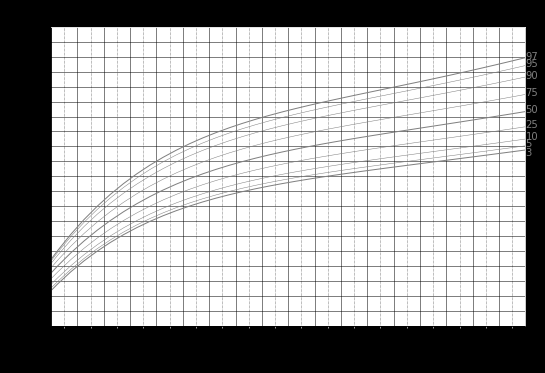

In [13]:
fig, ax = plt.subplots(figsize=(8.5, 5.5))

male_weight_df.plot(
    x='age',
    y=['3', '50', '97'],
    kind='line', 
    ax=ax, 
    color='gray', 
    linewidth='1'
)

male_weight_df.plot(
    x='age',
    y=['5', '10', '25', '75', '90', '95'],
    kind='line', 
    ax=ax, 
    color='gray', 
    linewidth='0.5'
)

ax.set_title('Male Infant Weight', color='black', fontsize=18)
ax.set_ylabel('Weight (in kilograms)', color='black', fontsize=16)
ax.set_xlabel('Age (in months)', color='black', fontsize=16)

plt.legend().remove()

# Add percentile label to each line
last_vals = male_weight_df.loc[36,'3':'97']
for col, val in last_vals.items():
    if col != '3':
        ax.text(36, val, col, color='gray')
    else:
        ax.text(36, val-0.3, col, color='gray')

ax.patch.set_facecolor('white')
ax.patch.set_edgecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='both', colors='black', labelsize=14)

# set grid interval
ax.set_xticks(np.arange(0, 37, 2))
ax.set_xticks(np.arange(0, 37, 1), minor=True)
ax.set_yticks(np.arange(0, 21, 1))

ax.grid(which='major', linewidth='0.5', linestyle='-', color='black')
ax.grid(which='minor', linewidth='0.5', linestyle=':', color='black')


In [5]:
fig.savefig('out/test/percentile.pdf', facecolor='w')

In [6]:
type(ax)

matplotlib.axes._subplots.AxesSubplot